# Synthesis Quality Evaluation

## Synthesis Quality Evaluation on Circle Dataset Considering the Data Size
[Circle dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) are used here to illustrate the synthesis quality of selected oversamplings.
The dataset is composed of two same heart circles with different radiuses.
One class data is reduced to simulate the imbalanced data.

### With a fixed imbalance ratio $ir=49$, the synthesis data are visiualized in the following figure with different total data size.

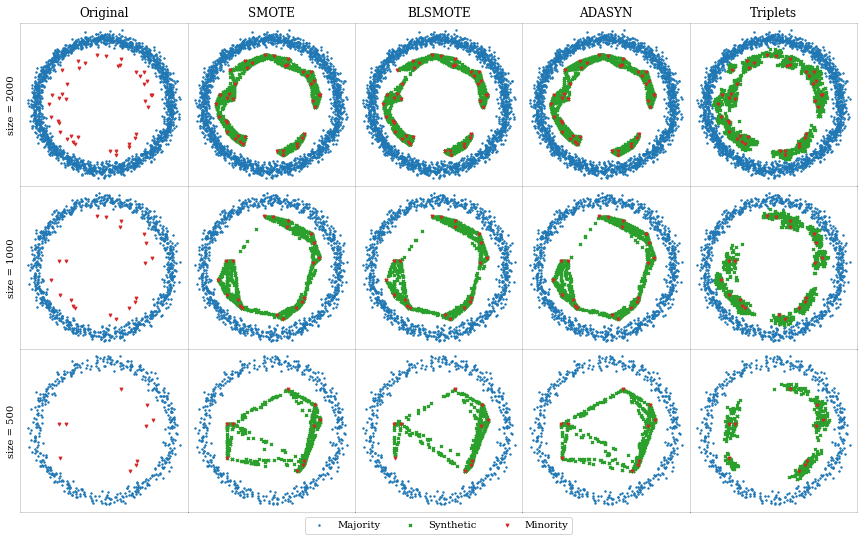

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
from src.cl_data import resampling
from sklearn.datasets import make_circles


plt.rcParams['font.family'] = 'serif'
colors = rcParams['axes.prop_cycle'].by_key()['color']
colors = np.array(colors)

np.random.seed(87)
ir = 49
sizes = [2000, 1000, 500]
sams = ['smote', 'blsmote', 'adasyn', 'triplets']
sams_dict = {
    'smote': 'SMOTE',
    'blsmote': 'BLSMOTE',
    'adasyn': 'ADASYN',
    'svmsmote': 'SVMSMOTE',
    'triplets': 'Triplets',
}

# circle
x_all, y_all =make_circles(n_samples=5000, noise=0.05, random_state=None, factor=0.7)

col = len(sams) + 1
row = len(sizes)

fig, axs = plt.subplots(row, col, figsize=(3 * col, 3 * row))
for i, size in enumerate(sizes):
    x_pos = x_all[y_all==1][:size*1//(ir+1)]
    x_neg = x_all[y_all==0][:size*ir//(ir+1)]
    x_org = np.concatenate([x_pos, x_neg])
    y_org = np.concatenate([np.ones(x_pos.shape[0]), np.zeros(x_neg.shape[0])]).astype(int)
    axs[i][0].scatter(x_org[y_org==0,0], x_org[y_org==0,1], c=colors[0], marker='.', s=8)
    axs[i][0].scatter(x_org[y_org==1,0], x_org[y_org==1,1], c=colors[3], marker='v', s=8)
    axs[i][0].set_ylabel(f'size = {size}')
    for j, sam in enumerate(sams):
        x_sam, y_sam = resampling(x_org, y_org, sam, len_lim=True, random=True)
        y_sam[len(y_org):] += 2
        axs[i][j+1].scatter(x_sam[y_sam==0,0], x_sam[y_sam==0,1], c=colors[0], marker='.', s=8)
        axs[i][j+1].scatter(x_sam[y_sam==3,0], x_sam[y_sam==3,1], c=colors[2], marker='x', s=8)
        axs[i][j+1].scatter(x_sam[y_sam==1,0], x_sam[y_sam==1,1], c=colors[3], marker='v', s=8)
        axs[0][j+1].set_title(f'{sams_dict[sam]}')
# DONT use ticks
for ax in axs.flat:
    ax.get_xaxis().set_visible(False)
    ax.set_yticks([], [])
    ax.spines[:].set_alpha(0.2)
axs[0][0].set_title('Original')
fig.subplots_adjust(hspace=0, wspace=0)
axs[2][2].legend(['Majority', 'Synthetic', 'Minority'], loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3)
fig.show()

### When we exchange the minority and the majority, the results are shown in the second figure.

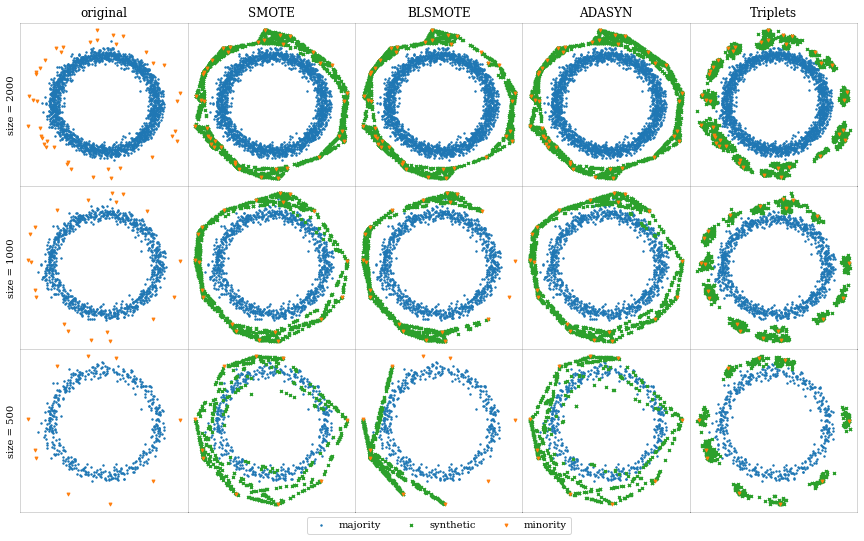

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
from src.cl_data import resampling
from sklearn.datasets import make_circles


plt.rcParams['font.family'] = 'serif'
colors = rcParams['axes.prop_cycle'].by_key()['color']
colors = np.array(colors)

np.random.seed(87)
ir = 49
sizes = [2000, 1000, 500]
sams = ['smote', 'blsmote', 'adasyn', 'triplets']
sams_dict = {
    'smote': 'SMOTE',
    'blsmote': 'BLSMOTE',
    'adasyn': 'ADASYN',
    'svmsmote': 'SVMSMOTE',
    'triplets': 'Triplets',
}

# circle
x_all, y_all =make_circles(n_samples=5000, noise=0.05, random_state=None, factor=0.7)
y_all = 1 - y_all

col = len(sams) + 1
row = len(sizes)

fig, axs = plt.subplots(row, col, figsize=(3 * col, 3 * row))
for i, size in enumerate(sizes):
    x_pos = x_all[y_all==1][:size*1//(ir+1)]
    x_neg = x_all[y_all==0][:size*ir//(ir+1)]
    x_org = np.concatenate([x_pos, x_neg])
    y_org = np.concatenate([np.ones(x_pos.shape[0]), np.zeros(x_neg.shape[0])]).astype(int)
    axs[i][0].scatter(x_org[y_org==0,0], x_org[y_org==0,1], c=colors[0], marker='.', s=8)
    axs[i][0].scatter(x_org[y_org==1,0], x_org[y_org==1,1], c=colors[1], marker='v', s=8)
    axs[i][0].set_ylabel(f'size = {size}')
    for j, sam in enumerate(sams):
        x_sam, y_sam = resampling(x_org, y_org, sam, len_lim=True, random=True)
        y_sam[len(y_org):] += 2
        axs[i][j+1].scatter(x_sam[y_sam==0,0], x_sam[y_sam==0,1], c=colors[0], marker='.', s=8)
        axs[i][j+1].scatter(x_sam[y_sam==3,0], x_sam[y_sam==3,1], c=colors[2], marker='x', s=8)
        axs[i][j+1].scatter(x_sam[y_sam==1,0], x_sam[y_sam==1,1], c=colors[1], marker='v', s=8)
        axs[0][j+1].set_title(f'{sams_dict[sam]}')
# DONT use ticks
for ax in axs.flat:
    ax.get_xaxis().set_visible(False)
    ax.set_yticks([], [])
    ax.spines[:].set_alpha(0.2)
axs[0][0].set_title('original')
fig.subplots_adjust(hspace=0, wspace=0)
axs[2][2].legend(['majority', 'synthetic', 'minority'], loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3)
fig.show()

## Synthesis Quality Evaluation on Circle Dataset Considering the Imbalance Ratio

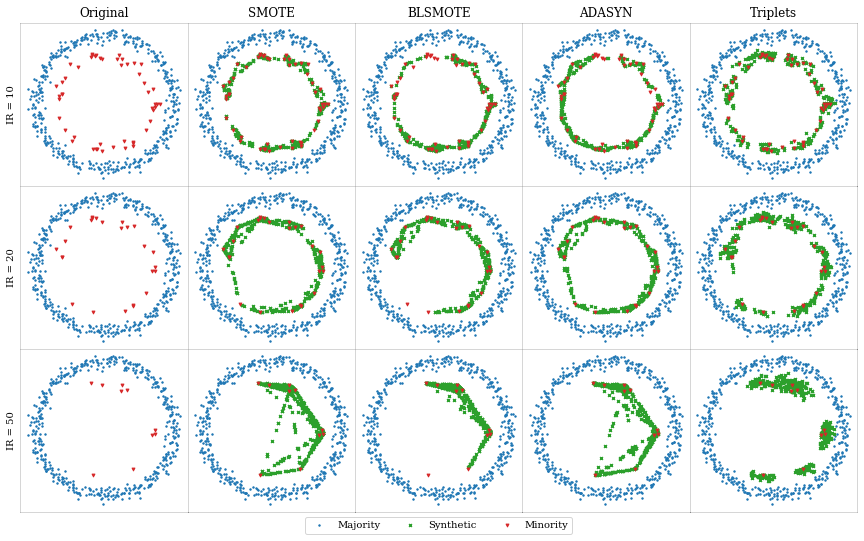

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
from src.cl_data import resampling
from sklearn.datasets import make_circles


plt.rcParams['font.family'] = 'serif'
colors = rcParams['axes.prop_cycle'].by_key()['color']
colors = np.array(colors)

np.random.seed(87)
size = 500
irs = [10, 20, 50]
sams = ['smote', 'blsmote', 'adasyn', 'triplets']
sams_dict = {
    'smote': 'SMOTE',
    'blsmote': 'BLSMOTE',
    'adasyn': 'ADASYN',
    'svmsmote': 'SVMSMOTE',
    'triplets': 'Triplets',
}

x_all, y_all =make_circles(n_samples=1000, noise=0.05, random_state=None, factor=0.7)

col = len(sams) + 1
row = len(irs)

fig, axs = plt.subplots(row, col, figsize=(3 * col, 3 * row))
for i, ir in enumerate(irs):
    x_pos = x_all[y_all==1][:size // ir]
    x_neg = x_all[y_all==0][:size * (ir - 1) // ir]
    x_org = np.concatenate([x_pos, x_neg])
    y_org = np.concatenate([np.ones(x_pos.shape[0]), np.zeros(x_neg.shape[0])]).astype(int)
    axs[i][0].scatter(x_org[y_org==0,0], x_org[y_org==0,1], c=colors[0], marker='.', s=8)
    axs[i][0].scatter(x_org[y_org==1,0], x_org[y_org==1,1], c=colors[3], marker='v', s=8)
    axs[i][0].set_ylabel(f'IR = {ir}')
    for j, sam in enumerate(sams):
        x_sam, y_sam = resampling(x_org, y_org, sam)
        y_sam[len(y_org):] += 2
        axs[i][j+1].scatter(x_sam[y_sam==0,0], x_sam[y_sam==0,1], c=colors[0], marker='.', s=8)
        axs[i][j+1].scatter(x_sam[y_sam==3,0], x_sam[y_sam==3,1], c=colors[2], marker='x', s=8)
        axs[i][j+1].scatter(x_sam[y_sam==1,0], x_sam[y_sam==1,1], c=colors[3], marker='v', s=8)
        axs[0][j+1].set_title(f'{sams_dict[sam]}')
# DONT use ticks
for ax in axs.flat:
    ax.get_xaxis().set_visible(False)
    ax.set_yticks([], [])
    ax.spines[:].set_alpha(0.2)
axs[0][0].set_title('Original')
fig.subplots_adjust(hspace=0, wspace=0)
axs[2][2].legend(['Majority', 'Synthetic', 'Minority'], loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3)
fig.show()